In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", low_memory=False)

In [3]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [4]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])
df = df.assign(AverageSalary= (df["LowestSalary"] + df["HighestSalary"])/2 )
df.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [5]:
#Get General Info On Data
print("Un-Cleaned Dataset General Info:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Unique Listings:\t",len(df))
print("Unique Job Categories:\t",len(df["Classification"].unique()))
print("Unique Job Titles:\t",len(df["Title"].unique()))
print("Unique Job Fields:\t",len(df["SubClassification"].unique()))
print("Unique Companies:\t",len(df["Company"].unique()))
print("Unique Cities:\t\t",len(df["Location"].unique()))
print("Unique Suburbs:\t\t",len(df["Area"].unique()))
print("Unique Contract Types:\t",len(df["JobType"].unique()))
df.head()

Un-Cleaned Dataset General Info:
~~~~~~~~~~~~~~~~~~~~~~
Unique Listings:	 318477
Unique Job Categories:	 31
Unique Job Titles:	 168065
Unique Job Fields:	 339
Unique Companies:	 40629
Unique Cities:		 66
Unique Suburbs:		 20
Unique Contract Types:	 5


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [6]:
df.isnull().sum()

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
dtype: int64

In [7]:
#Remove Duplicate and NaN values
df.drop(['FullDescription', 'Area', 'HighestSalary','LowestSalary', 'Requirement' ], axis=1, inplace=True)
df.drop_duplicates(subset=['Title', 'Date', 'Location', 'Company'], keep='first', inplace=True)
df.dropna(subset=['Location', 'Title', 'Company', 'Date', 'Classification', 'JobType', 'AverageSalary'],inplace=True)

In [8]:
#Get General Info On Data
print("Cleaned Dataset General Info:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Unique Listings:\t",len(df))
print("Unique Job Titles:\t",len(df["Title"].unique()))
print("Unique Job Sectors:\t",len(df["Classification"].unique()))
print("Unique Sub Sectors\t",len(df["SubClassification"].unique()))
print("Unique Companies:\t",len(df["Company"].unique()))
print("Unique Cities:\t\t",len(df["Location"].unique()))
print("Unique Contract Types:\t",len(df["JobType"].unique()))
df.head()


Cleaned Dataset General Info:
~~~~~~~~~~~~~~~~~~~~~~
Unique Listings:	 156183
Unique Job Titles:	 100635
Unique Job Sectors:	 30
Unique Sub Sectors	 338
Unique Companies:	 28782
Unique Cities:		 65
Unique Contract Types:	 4


,Id,Title,Company,Date,Location,Classification,SubClassification,JobType,AverageSalary
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07,Melbourne,Trades & Services,Welders & Boilermakers,Full Time,15.0
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07,Brisbane,Trades & Services,Welders & Boilermakers,Full Time,15.0
123,37404364,Relationship Manager - Industry Banking,BankSA,2018-10-07,Adelaide,Banking & Financial Services,Banking - Business,Full Time,15.0
124,37404363,Relationship Manager - Industry Banking,BankSA,2018-10-07,Darwin,Banking & Financial Services,Banking - Business,Full Time,15.0
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07,Sydney,Education & Training,Teaching - Early Childhood,Contract/Temp,15.0


In [9]:
#Get General Info On Data
print("Cleaned Dataset Column Info:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Unique Job Categories:\n", df["Classification"].unique(),"\n")
print("Unique Job Titles:\n", df["Title"].unique(), "\n")
print("Unique Job Fields:\n", df["SubClassification"].unique(), "\n")
print("Unique Companies:\n", df["Company"].unique(), "\n")
print("Unique Cities:\n", df["Location"].unique(), "\n")
print("Unique Contract Types:\n", df["JobType"].unique(), "\n")

Cleaned Dataset Column Info:
~~~~~~~~~~~~~~~~~~~~~~
Unique Job Categories:
 ['Trades & Services' 'Banking & Financial Services' 'Education & Training'
 'Engineering' 'Information & Communication Technology'
 'Marketing & Communications' 'CEO & General Management'
 'Human Resources & Recruitment' 'Accounting' 'Design & Architecture'
 'Manufacturing, Transport & Logistics' 'Legal' 'Real Estate & Property'
 'Healthcare & Medical' 'Construction' 'Government & Defence'
 'Sport & Recreation' 'Hospitality & Tourism' 'Sales'
 'Retail & Consumer Products' 'Call Centre & Customer Service'
 'Mining, Resources & Energy' 'Administration & Office Support'
 'Science & Technology' 'Advertising, Arts & Media'
 'Insurance & Superannuation' 'Community Services & Development'
 'Farming, Animals & Conservation' 'Self Employment'
 'Consulting & Strategy'] 

Unique Job Titles:
 ['Fabricator/Installer' 'Boilermaker'
 'Relationship Manager - Industry Banking' ...
 'IT Test Analyst OR Senior IT Test Analyst'
 '

In [10]:
print("Number of Listings Per City:")
print("~~~~~~~~~~~~~~~~~~~~~~")
city_counts = df['Location'].value_counts()
print(city_counts)



Number of Listings Per City:
~~~~~~~~~~~~~~~~~~~~~~
Sydney                                  48846
Melbourne                               36756
Brisbane                                16795
Perth                                   10519
Adelaide                                 5233
                                        ...  
Yorke Peninsula & Clare Valley             79
Tumut, Snowy & Monaro                      75
Fleurieu Peninsula & Kangaroo Island       56
Somerset & Lockyer                         54
Central & South East TAS                   40
Name: Location, Length: 65, dtype: int64


In [11]:
city_counts[0:5].plot(kind='pie', title="Top Cities for Job Listings")

In [12]:
print("Number of Listings Per Sector:")
print("~~~~~~~~~~~~~~~~~~~~~~")
sector_counts = df['Classification'].value_counts()
sector_counts

Number of Listings Per Sector:
~~~~~~~~~~~~~~~~~~~~~~


Information & Communication Technology    18640
Trades & Services                         14311
Healthcare & Medical                      13444
Hospitality & Tourism                     12436
Manufacturing, Transport & Logistics       9800
Administration & Office Support            7864
Accounting                                 7543
Construction                               6839
Education & Training                       6805
Retail & Consumer Products                 6668
Sales                                      6570
Engineering                                5171
Mining, Resources & Energy                 5036
Government & Defence                       5027
Banking & Financial Services               3666
Community Services & Development           3533
Legal                                      3388
Human Resources & Recruitment              3332
Marketing & Communications                 3171
Call Centre & Customer Service             3010
Real Estate & Property                  

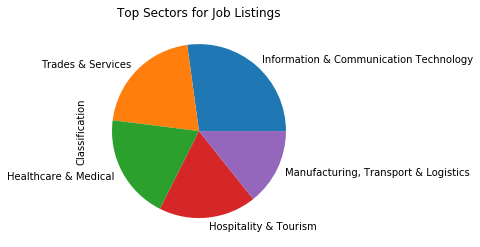

In [13]:
sector_counts[0:5].plot(kind='pie', title="Top Sectors for Job Listings")

In [14]:
print("Unique Average Salaries:\n", df['AverageSalary'].unique())

Unique Average Salaries:
 [ 15.   35.   45.   55.   65.   75.   90.  110.  135.  175.  599.5]


In [30]:
SectorSalaries = df[['Classification', 'AverageSalary']].groupby('Classification')['AverageSalary'].mean().sort_values()
SectorSalaries

Classification
Hospitality & Tourism                      39.959151
Retail & Consumer Products                 44.455234
Administration & Office Support            48.313009
Call Centre & Customer Service             48.451661
Trades & Services                          53.471106
Community Services & Development           56.348005
Sport & Recreation                         57.222293
Farming, Animals & Conservation            57.944687
Manufacturing, Transport & Logistics       58.172908
Advertising, Arts & Media                  69.578192
Education & Training                       71.037325
Real Estate & Property                     80.769284
Sales                                      81.469787
Self Employment                            83.306250
Marketing & Communications                 83.767424
Design & Architecture                      86.943351
Human Resources & Recruitment              87.271459
Accounting                                 87.310288
Insurance & Superannuation     

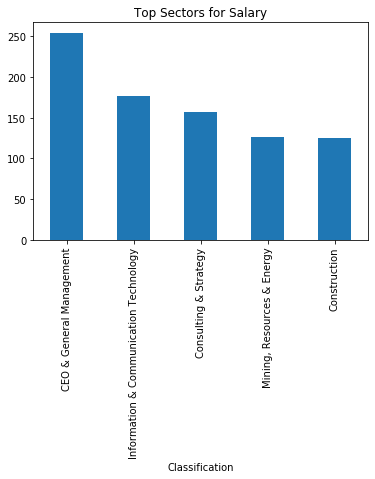

In [42]:
SectorSalaries[-1:-6:-1].plot(kind='bar', title="Top Sectors for Salary")